# Cricket data analysis, model training and forecasting

# ML Assignment.
By Group No: 13 (Data Set 1 with3700 json files)
MB23009	MANOJ A M
MB23003	SOHAN BALACHANDRAN
MB23010	SHIVANSH MISHRA
MB23027	JITESH PARIHAR

# Data Cleaning and Preprocessing

Converting json data into csv data frame

In [2]:
import os
import json
import pandas as pd
from pandas import json_normalize

In [10]:
folder_path = r"C:\Users\manoj\Downloads\t20s_json"

In [11]:
# List to hold individual match data
match_data = []

In [12]:
# Loop through each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        with open(os.path.join(folder_path, filename), 'r') as f:
            # Load JSON file
            data = json.load(f)
            
            # Extract metadata and match info
            meta = data.get('meta', {})
            info = data.get('info', {})
            innings = data.get('innings', [])
            
            # Flatten JSON data for easier analysis
            match_info = {
                'match_id': filename.split('.')[0],
                'city': info.get('city'),
                'date': info.get('dates', [None])[0],
                'event': info.get('event', {}).get('name'),
                'team1': info.get('teams', [None, None])[0],
                'team2': info.get('teams', [None, None])[1],
                'toss_winner': info.get('toss', {}).get('winner'),
                'toss_decision': info.get('toss', {}).get('decision'),
                'outcome': info.get('outcome', {}).get('winner'),
                'winner_margin': info.get('outcome', {}).get('by', {}),
                'player_of_match': info.get('player_of_match', [None])[0]
            }
            
            # Iterate through innings
            for inning in innings:
                inning_data = {
                    'team': inning.get('team'),
                    'overs': inning.get('overs')
                }
                match_info['innings'] = inning_data
                
                # Append flattened data to list
                match_data.append(match_info)

# Convert list of dictionaries to DataFrame
df_matches = pd.DataFrame(match_data)

# Display the loaded data
print("Data Loaded:")
print(df_matches.head())

Data Loaded:
  match_id      city        date                               event  \
0  1001349      None  2017-02-17  Sri Lanka in Australia T20I Series   
1  1001349      None  2017-02-17  Sri Lanka in Australia T20I Series   
2  1001351  Victoria  2017-02-19  Sri Lanka in Australia T20I Series   
3  1001351  Victoria  2017-02-19  Sri Lanka in Australia T20I Series   
4  1001353      None  2017-02-22  Sri Lanka in Australia T20I Series   

       team1      team2 toss_winner toss_decision    outcome   winner_margin  \
0  Australia  Sri Lanka   Sri Lanka         field  Sri Lanka  {'wickets': 5}   
1  Australia  Sri Lanka   Sri Lanka         field  Sri Lanka  {'wickets': 5}   
2  Australia  Sri Lanka   Sri Lanka         field  Sri Lanka  {'wickets': 2}   
3  Australia  Sri Lanka   Sri Lanka         field  Sri Lanka  {'wickets': 2}   
4  Australia  Sri Lanka   Sri Lanka         field  Australia    {'runs': 41}   

  player_of_match                                            innings  
0 

In [13]:
# Save DataFrame as CSV file
df_matches.to_csv("t20s_match_data.csv", index=False)
print("Data saved to t20s_match_data.csv")


Data saved to t20s_match_data.csv


# 2.	Feature Engineering 

In [14]:
#Overs and target data extraction

In [16]:
import os
import json
import pandas as pd
from pandas import json_normalize

# Path to the folder containing JSON files
folder_path = r"C:\Users\manoj\Downloads\t20s_json"

# List to hold individual match data
match_data = []

# Loop through each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        with open(os.path.join(folder_path, filename), 'r') as f:
            # Load JSON file
            data = json.load(f)
            
            # Extract metadata and match info
            meta = data.get('meta', {})
            info = data.get('info', {})
            innings = data.get('innings', [])
            
            # Flatten JSON data for easier analysis
            match_info = {
                'match_id': filename.split('.')[0],
                'city': info.get('city'),
                'date': info.get('dates', [None])[0],
                'event': info.get('event', {}).get('name'),
                'match_type': info.get('match_type'),
                'season': info.get('season'),
                'venue': info.get('venue'),  # Add venue information
                'team1': info.get('teams', [None, None])[0],
                'team2': info.get('teams', [None, None])[1],
                'toss_winner': info.get('toss', {}).get('winner'),
                'toss_decision': info.get('toss', {}).get('decision'),
                'outcome': info.get('outcome', {}).get('winner'),
                'winner_margin': info.get('outcome', {}).get('by', {}),
                'player_of_match': info.get('player_of_match', [None])[0]
            }
            
            # Iterate through innings and extract target if available
            team1_overs = []
            team2_overs = []
            target_data = None
            for idx, inning in enumerate(innings):
                team_name = inning.get('team')
                overs_data = inning.get('overs', [])
                
                # Collect overs data for each team
                if idx == 0:
                    team1_overs = overs_data
                elif idx == 1:
                    team2_overs = overs_data
                    # Extract target if available in the second innings
                    target_data = inning.get('target')

            # Add extracted information to match_info dictionary
            match_info['team1_overs'] = team1_overs
            match_info['team2_overs'] = team2_overs
            match_info['target_overs'] = target_data.get('overs') if target_data else None
            match_info['target_runs'] = target_data.get('runs') if target_data else None
            
            # Append flattened data to list
            match_data.append(match_info)

# Convert list of dictionaries to DataFrame
df_matches = pd.DataFrame(match_data)

# Remove duplicate rows based on "match_id"
df_matches.drop_duplicates(subset=['match_id'], inplace=True)

# Display the loaded data to verify
print("Data Loaded:")
print(df_matches.head())

# Save DataFrame to CSV if needed
df_matches.to_csv("t20s_match_data1.csv", index=False)
print("Data saved to t20s_match_data1.csv")


Data Loaded:
  match_id         city        date                               event  \
0  1001349         None  2017-02-17  Sri Lanka in Australia T20I Series   
1  1001351     Victoria  2017-02-19  Sri Lanka in Australia T20I Series   
2  1001353         None  2017-02-22  Sri Lanka in Australia T20I Series   
3  1004729  Londonderry  2016-09-05    Hong Kong in Ireland T20I Series   
4  1007655         None  2016-06-18       India in Zimbabwe T20I Series   

  match_type   season                              venue      team1  \
0        T20  2016/17           Melbourne Cricket Ground  Australia   
1        T20  2016/17     Simonds Stadium, South Geelong  Australia   
2        T20  2016/17                      Adelaide Oval  Australia   
3        T20     2016  Bready Cricket Club, Magheramason    Ireland   
4        T20     2016                 Harare Sports Club   Zimbabwe   

       team2 toss_winner toss_decision    outcome   winner_margin  \
0  Sri Lanka   Sri Lanka         field  

In [3]:
data = pd.read_csv('t20s_match_data1.csv')

In [4]:
# Describing Numerical Values of the Dataset
data.describe()

,match_id,target_overs,target_runs
count,3.798000e+03,3720.000000,3720.000000
mean,1.191518e+06,19.523710,137.873387
std,2.902664e+05,2.109488,44.720221
min,2.110280e+05,5.000000,7.000000
25%,1.157760e+06,20.000000,108.000000
50%,1.298144e+06,20.000000,140.000000
75%,1.391336e+06,20.000000,168.000000
max,1.451294e+06,20.000000,319.000000


In [5]:
# Information (not-null count and data type) About Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         3798 non-null   int64  
 1   city             3600 non-null   object 
 2   date             3798 non-null   object 
 3   event            3731 non-null   object 
 4   match_type       3798 non-null   object 
 5   season           3798 non-null   object 
 6   venue            3798 non-null   object 
 7   team1            3798 non-null   object 
 8   team2            3798 non-null   object 
 9   toss_winner      3798 non-null   object 
 10  toss_decision    3798 non-null   object 
 11  outcome          3683 non-null   object 
 12  winner_margin    3798 non-null   object 
 13  player_of_match  3407 non-null   object 
 14  team1_overs      3798 non-null   object 
 15  team2_overs      3798 non-null   object 
 16  target_overs     3720 non-null   float64
 17  target_runs   

In [6]:
# Number of Unique Values in each column
data.nunique()

match_id           3798
city                216
date               1782
event               518
match_type            1
season               41
venue               405
team1               103
team2               102
toss_winner         103
toss_decision         2
outcome              97
winner_margin       189
player_of_match    1468
team1_overs        3798
team2_overs        3746
target_overs         44
target_runs         250
dtype: int64

# Extracting Batting and Bowling Performance (ball by ball)

In [17]:
import pandas as pd
from collections import defaultdict

# List to store match data with player performance
matches_with_performance = []

# Loop through each match row in the original DataFrame
for _, row in df_matches.iterrows():
    match_id = row['match_id']
    team1 = row['team1']
    team2 = row['team2']
    team1_overs = row['team1_overs']
    team2_overs = row['team2_overs']

    # Function to extract player performance for a team
    def get_player_performance(overs):
        player_runs = defaultdict(int)
        player_balls = defaultdict(int)
        player_fours = defaultdict(int)
        player_sixes = defaultdict(int)
        player_dot_balls = defaultdict(int)
        bowler_wickets = defaultdict(int)

        for over in overs:
            for delivery in over['deliveries']:
                # Track batter stats
                batter = delivery['batter']
                runs_scored = delivery['runs']['batter']
                
                # Update runs and balls
                player_runs[batter] += runs_scored
                player_balls[batter] += 1

                # Count boundaries, sixes, and dot balls
                if runs_scored == 4:
                    player_fours[batter] += 1
                elif runs_scored == 6:
                    player_sixes[batter] += 1
                elif runs_scored == 0:
                    player_dot_balls[batter] += 1

                # Track bowler stats
                bowler = delivery['bowler']
                if 'wickets' in delivery:
                    for wicket in delivery['wickets']:
                        bowler_wickets[bowler] += 1

        # Create DataFrames to store performance data
        batter_df = pd.DataFrame(list(player_runs.items()), columns=['Batter', 'Runs'])
        batter_df['Balls_Faced'] = batter_df['Batter'].map(player_balls)
        batter_df['Fours'] = batter_df['Batter'].map(player_fours)
        batter_df['Sixes'] = batter_df['Batter'].map(player_sixes)
        batter_df['Dot_Balls'] = batter_df['Batter'].map(player_dot_balls)

        bowler_df = pd.DataFrame(list(bowler_wickets.items()), columns=['Bowler', 'Wickets'])
        return batter_df, bowler_df

    # Get player performance for both teams
    team1_batting, team1_bowling = get_player_performance(team1_overs)
    team2_batting, team2_bowling = get_player_performance(team2_overs)

    # Add data for the current match to the list
    matches_with_performance.append({
        'match_id': match_id,
        'team1_batting': team1_batting,
        'team1_bowling': team1_bowling,
        'team2_batting': team2_batting,
        'team2_bowling': team2_bowling
    })

# Create a new DataFrame with the performance data for each match
df_performance = pd.DataFrame(matches_with_performance)

# Display the combined data with the updated performance stats
print("Data with Enhanced Player Performance:")
print(df_performance.head())

# Save to a new CSV file if needed
#df_performance.to_csv("t20s_match_performance_data.csv", index=False)
#print("Data saved to t20s_match_performance_data.csv")


Data with Enhanced Player Performance:
  match_id                                      team1_batting  \
0  1001349           Batter  Runs  Balls_Faced  Fours  Six...   
1  1001351             Batter  Runs  Balls_Faced  Fours  S...   
2  1001353           Batter  Runs  Balls_Faced  Fours  Six...   
3  1004729            Batter  Runs  Balls_Faced  Fours  Si...   
4  1007655            Batter  Runs  Balls_Faced  Fours  Si...   

                                       team1_bowling  \
0              Bowler  Wickets
0   PADLR Sandakan...   
1              Bowler  Wickets
0    JRMVB Sanjaya...   
2         Bowler  Wickets
0  S Prasanna        1
...   
3         Bowler  Wickets
0    CA Young        2
...   
4         Bowler  Wickets
0   JJ Bumrah        2
...   

                                       team2_batting  \
0              Batter  Runs  Balls_Faced  Fours  ...   
1              Batter  Runs  Balls_Faced  Fours  ...   
2               Batter  Runs  Balls_Faced  Fours ...   
3        

In [20]:
# Merge df_matches and df_performance on 'match_id'
df_combined = pd.merge(df_matches, df_performance, on='match_id', how='inner')

# Display the first few rows of the combined DataFrame
print("Combined DataFrame with Match and Performance Data:")
print(df_combined.head())

# Save the combined DataFrame to a CSV file if needed
df_combined.to_csv("t20s_combined_match_data.csv", index=False)
print("Data saved to t20s_combined_match_data.csv")

Combined DataFrame with Match and Performance Data:
  match_id         city        date                               event  \
0  1001349         None  2017-02-17  Sri Lanka in Australia T20I Series   
1  1001351     Victoria  2017-02-19  Sri Lanka in Australia T20I Series   
2  1001353         None  2017-02-22  Sri Lanka in Australia T20I Series   
3  1004729  Londonderry  2016-09-05    Hong Kong in Ireland T20I Series   
4  1007655         None  2016-06-18       India in Zimbabwe T20I Series   

  match_type   season                              venue      team1  \
0        T20  2016/17           Melbourne Cricket Ground  Australia   
1        T20  2016/17     Simonds Stadium, South Geelong  Australia   
2        T20  2016/17                      Adelaide Oval  Australia   
3        T20     2016  Bready Cricket Club, Magheramason    Ireland   
4        T20     2016                 Harare Sports Club   Zimbabwe   

       team2 toss_winner  ...   winner_margin player_of_match  \
0  Sr

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "t20s_match_data1.csv"  # Update this with the actual path to the CSV file if needed
df = pd.read_csv(file_path)

# Display basic info to understand the structure
print(df.head())
print(df.info())

   match_id         city        date                               event  \
0   1001349          NaN  2017-02-17  Sri Lanka in Australia T20I Series   
1   1001351     Victoria  2017-02-19  Sri Lanka in Australia T20I Series   
2   1001353          NaN  2017-02-22  Sri Lanka in Australia T20I Series   
3   1004729  Londonderry  2016-09-05    Hong Kong in Ireland T20I Series   
4   1007655          NaN  2016-06-18       India in Zimbabwe T20I Series   

  match_type   season                              venue      team1  \
0        T20  2016/17           Melbourne Cricket Ground  Australia   
1        T20  2016/17     Simonds Stadium, South Geelong  Australia   
2        T20  2016/17                      Adelaide Oval  Australia   
3        T20     2016  Bready Cricket Club, Magheramason    Ireland   
4        T20     2016                 Harare Sports Club   Zimbabwe   

       team2 toss_winner toss_decision    outcome   winner_margin  \
0  Sri Lanka   Sri Lanka         field  Sri Lan

In [3]:
# Convert date column to datetime format
#df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract the winner margin type and value for easier visualization
df['winner_margin_type'] = df['winner_margin'].apply(lambda x: eval(x).keys()).str[0]
df['winner_margin_value'] = df['winner_margin'].apply(lambda x: eval(x).values()).str[0]

# Drop rows with missing values, if necessary
#df.dropna(inplace=True)

# 3.	Data Visualization

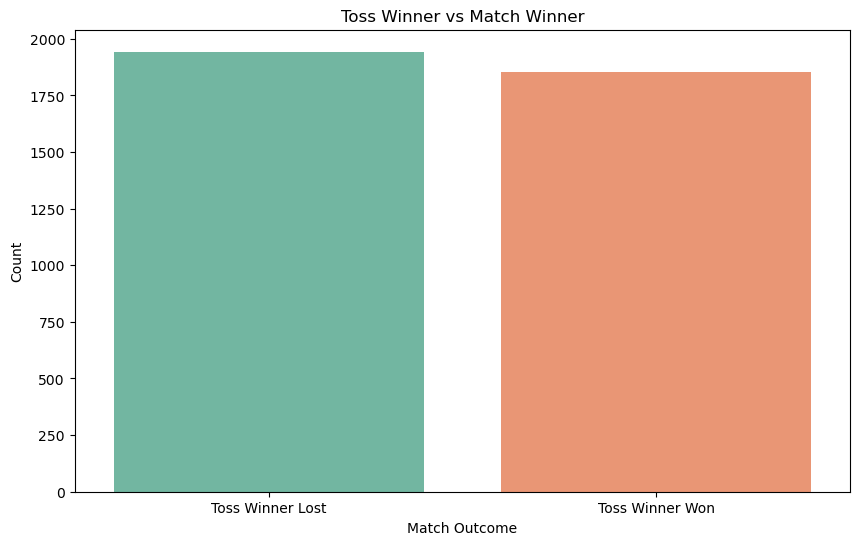

In [11]:
# Plotting

# 1. Toss Winner vs Match Winner (Stacked Bar Plot)
plt.figure(figsize=(10, 6))
toss_vs_match = df['toss_winner'] == df['outcome']  # Check if toss winner is also match winner
toss_result = toss_vs_match.value_counts().rename(index={True: 'Toss Winner Won', False: 'Toss Winner Lost'})

sns.barplot(x=toss_result.index, y=toss_result.values, palette="Set2")
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Match Outcome')
plt.ylabel('Count')
plt.show()


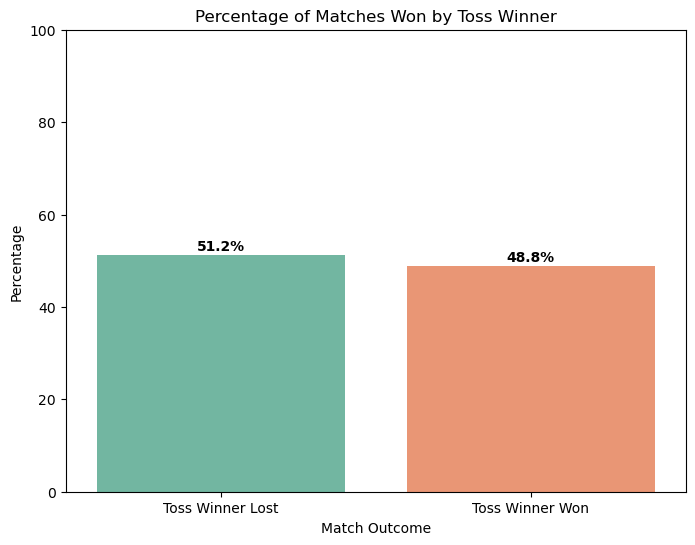

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of matches where the toss winner won or lost
toss_vs_match = (df['toss_winner'] == df['outcome']).value_counts().rename(index={True: 'Toss Winner Won', False: 'Toss Winner Lost'})

# Convert counts to percentages
toss_result_percentage = (toss_vs_match / toss_vs_match.sum()) * 100

# Plot as a bar plot with percentage labels
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_result_percentage.index, y=toss_result_percentage.values, palette="Set2")

# Add percentage labels above each bar
for i, v in enumerate(toss_result_percentage):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

# Set plot titles and labels
plt.title('Percentage of Matches Won by Toss Winner')
plt.xlabel('Match Outcome')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()


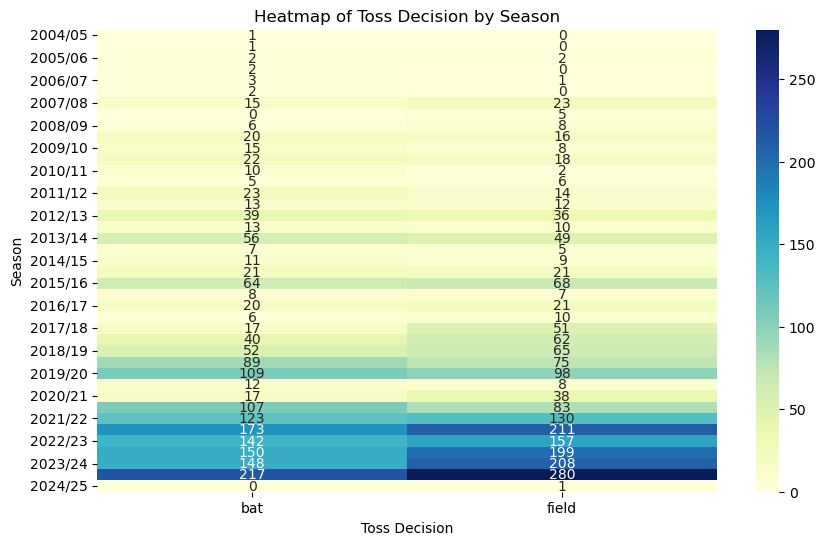

In [5]:
# 2. Heatmap of Toss Decision by Season
plt.figure(figsize=(10, 6))
toss_decision_counts = pd.crosstab(df['season'], df['toss_decision'])
sns.heatmap(toss_decision_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Toss Decision by Season')
plt.xlabel('Toss Decision')
plt.ylabel('Season')
plt.show()

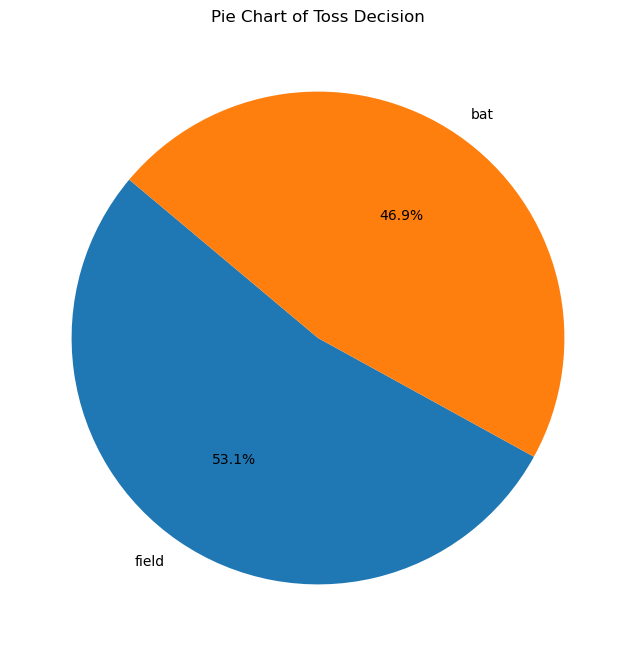

In [6]:
# 3. Pie Chart for Toss Decision
toss_decision_counts = df['toss_decision'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Toss Decision')
plt.show()


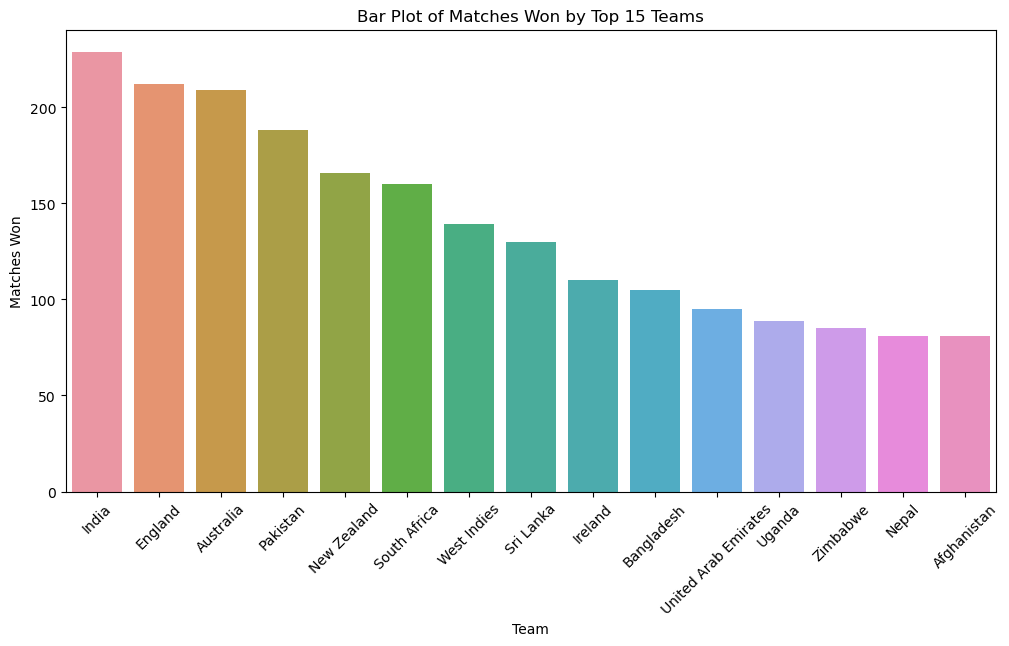

In [9]:
# 4. Bar Plot of Number of Matches Won by Each Team (Top 15 Teams Only)
plt.figure(figsize=(12, 6))
top_teams = df['outcome'].value_counts().nlargest(15)  # Get the top 15 teams by matches won
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Bar Plot of Matches Won by Top 15 Teams')
plt.xlabel('Team')
plt.ylabel('Matches Won')
plt.xticks(rotation=45)
plt.show()

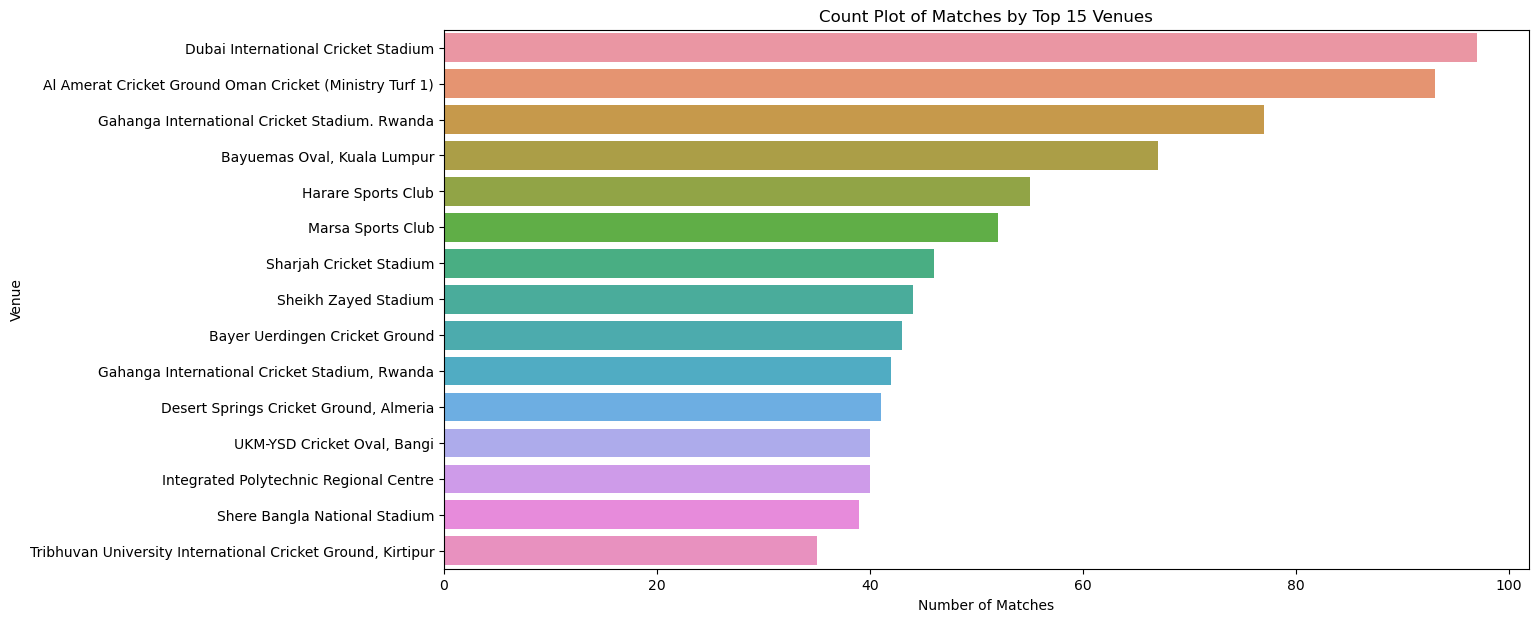

In [10]:
# 5. Count Plot of Matches by Venue (Top 15 Venues Only)
plt.figure(figsize=(14, 7))
top_venues = df['venue'].value_counts().nlargest(15)  # Get the top 15 venues by match count
sns.countplot(data=df[df['venue'].isin(top_venues.index)], y='venue', order=top_venues.index)
plt.title('Count Plot of Matches by Top 15 Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

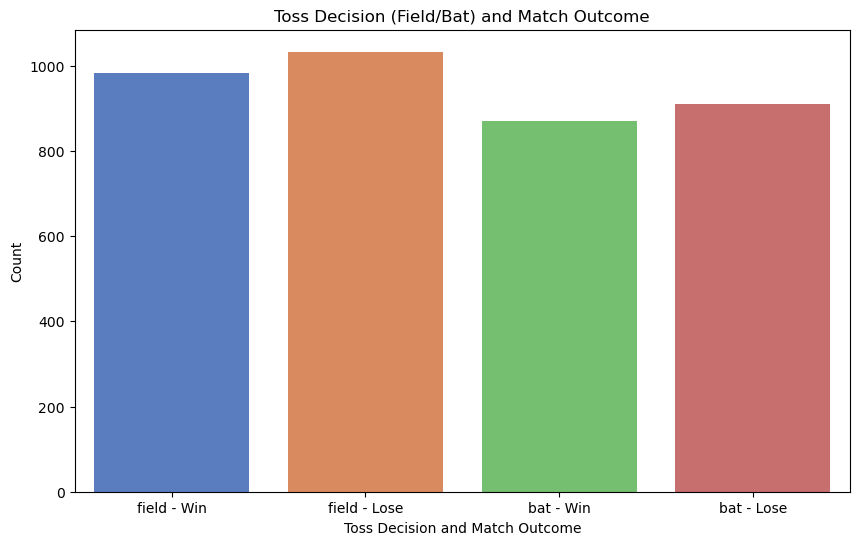

In [12]:
# 2. Toss Decision (Field/Bat) and Match Outcome (Count Plot)
plt.figure(figsize=(10, 6))
df['toss_decision_vs_outcome'] = (df['toss_decision'] + " - " + (df['toss_winner'] == df['outcome']).map({True: 'Win', False: 'Lose'}))
sns.countplot(data=df, x='toss_decision_vs_outcome', order=['field - Win', 'field - Lose', 'bat - Win', 'bat - Lose'], palette="muted")
plt.title('Toss Decision (Field/Bat) and Match Outcome')
plt.xlabel('Toss Decision and Match Outcome')
plt.ylabel('Count')
plt.show()

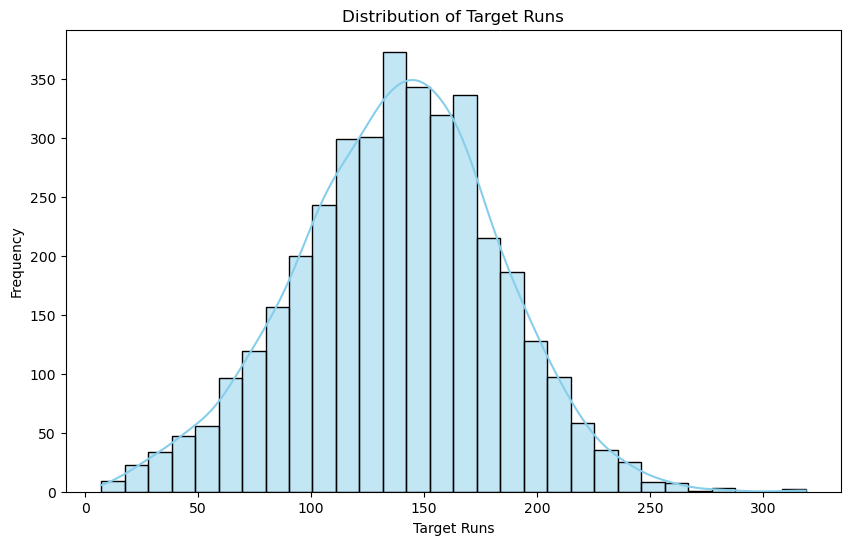

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['target_runs'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Target Runs')
plt.xlabel('Target Runs')
plt.ylabel('Frequency')
plt.show()


# 4.	Exploratory Data Analysis (EDA):

In [ ]:
#Q&A

# i. Which team has won the most tosses?

In [21]:
toss_winner_counts = df['toss_winner'].value_counts()
most_toss_winner_team = toss_winner_counts.idxmax()
most_toss_winner_count = toss_winner_counts.max()
print(f"The team that has won the most tosses is {most_toss_winner_team} with {most_toss_winner_count} toss wins.")


The team that has won the most tosses is Pakistan with 185 toss wins.


# ii.	Does winning the toss implies winning the game?

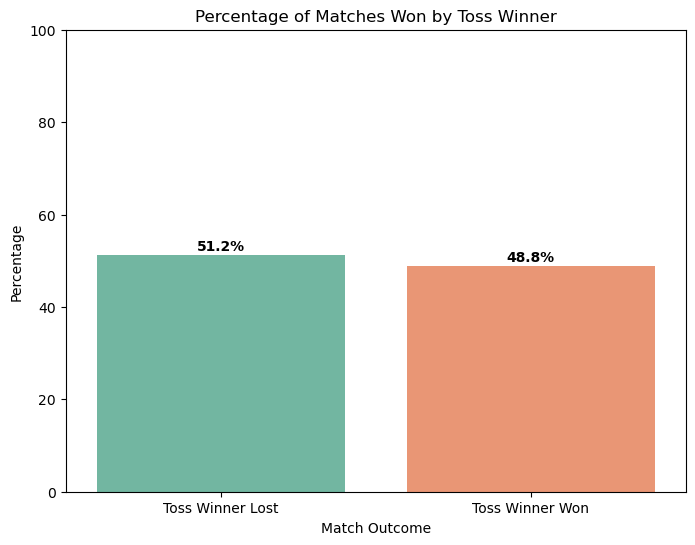

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of matches where the toss winner won or lost
toss_vs_match = (df['toss_winner'] == df['outcome']).value_counts().rename(index={True: 'Toss Winner Won', False: 'Toss Winner Lost'})

# Convert counts to percentages
toss_result_percentage = (toss_vs_match / toss_vs_match.sum()) * 100

# Plot as a bar plot with percentage labels
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_result_percentage.index, y=toss_result_percentage.values, palette="Set2")

# Add percentage labels above each bar
for i, v in enumerate(toss_result_percentage):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

# Set plot titles and labels
plt.title('Percentage of Matches Won by Toss Winner')
plt.xlabel('Match Outcome')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()


In [24]:
#NO, winning the toss doesn't implies winning the game as we can see toss winner have lost more than 50% of the matches

# iii. How many times has the chasing team won the match?

In [26]:
chasing_wins = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['outcome'])].shape[0]
print(f"The chasing team has won the match {chasing_wins} times.")


The chasing team has won the match 984 times.


# iv. Which team has won the most number of times?

In [30]:
match_winner_counts = df['outcome'].value_counts()
most_match_wins_team = match_winner_counts.idxmax()
most_match_wins_count = match_winner_counts.max()
print(f"The team with the most match wins is {most_match_wins_team} with {most_match_wins_count} wins.")


The team with the most match wins is India with 229 wins.


# v. Which team has the highest winning percentage?

In [34]:
total_matches_played = df['team1'].value_counts() + df['team2'].value_counts()
winning_counts = df['outcome'].value_counts()
winning_percentage = (winning_counts / total_matches_played) * 100
highest_winning_percentage_team = winning_percentage.idxmax()
highest_winning_percentage = winning_percentage.max()
print(f"The team with the highest winning percentage is {highest_winning_percentage_team} with {highest_winning_percentage:.2f}% wins.")


The team with the highest winning percentage is Spain with 81.40% wins.


# viii. Which team has scored the most number of 200+ scores?

In [38]:
high_scores = df[df['target_runs'] >= 200]
high_scores_count = high_scores['team1'].value_counts() + high_scores['team2'].value_counts()
most_200_scores_team = high_scores_count.idxmax()
most_200_scores_count = high_scores_count.max()
print(f"The team with the most 200+ scores is {most_200_scores_team} with {most_200_scores_count} count scores of 200 or more.")


The team with the most 200+ scores is India with 41.0 count scores of 200 or more.


# ix. Which team has conceded 200+ scores the most?

In [41]:
conceded_200_count = high_scores['team2'].value_counts() + high_scores['team1'].value_counts()
most_conceded_200_team = conceded_200_count.idxmax()
most_conceded_200_count = conceded_200_count.max()
print(f"The team that has conceded 200+ scores the most is {most_conceded_200_team} with {most_conceded_200_count} times.")


The team that has conceded 200+ scores the most is India with 41.0 times.


# x. What was the highest run scored by a team in a single match?

In [46]:
highest_score = df['target_runs'].max()
team_highest_score = df.loc[df['target_runs'].idxmax(), ['team1', 'team2', 'target_runs']]
print(f"The highest run scored by a team in a single match is {highest_score} by {team_highest_score} vs team2.")


The highest run scored by a team in a single match is 319.0 by team1               Bahrain
team2          Saudi Arabia
target_runs           319.0
Name: 1310, dtype: object vs team2.


# xi. Which is the biggest win in terms of run margin?

In [51]:
import pandas as pd
import ast

# Sample data loading (assuming df is your DataFrame)
# df = pd.read_csv("your_file.csv") # Uncomment this line if you're loading from a file

# Parse the 'winner_margin' column to convert strings into dictionaries
def parse_margin(margin):
    try:
        # Convert the string representation of dictionary to an actual dictionary
        margin_dict = ast.literal_eval(margin)
        return margin_dict
    except (ValueError, SyntaxError):
        # If there's an error in conversion, return None
        return None

# Apply the parsing function to the 'winner_margin' column
df['winner_margin_parsed'] = df['winner_margin'].apply(parse_margin)

# Extract run and wicket margins after parsing
df['run_margin'] = df['winner_margin_parsed'].apply(lambda x: x['runs'] if isinstance(x, dict) and 'runs' in x else None)
df['wicket_margin'] = df['winner_margin_parsed'].apply(lambda x: x['wickets'] if isinstance(x, dict) and 'wickets' in x else None)

# Find the maximum run margin and corresponding team
max_run_margin = df['run_margin'].max()
team_max_run_margin = df.loc[df['run_margin'].idxmax(), 'outcome'] if not df['run_margin'].isnull().all() else None

# Find the maximum wicket margin and corresponding team
max_wicket_margin = df['wicket_margin'].max()
team_max_wicket_margin = df.loc[df['wicket_margin'].idxmax(), 'outcome'] if not df['wicket_margin'].isnull().all() else None

# Display the results
if not pd.isna(max_run_margin):
    print(f"The biggest win in terms of run margin is {max_run_margin} runs by {team_max_run_margin}.")
else:
    print("No valid run margin data found.")

if not pd.isna(max_wicket_margin):
    print(f"The biggest win in terms of wicket margin is {max_wicket_margin} wickets by {team_max_wicket_margin}.")
else:
    print("No valid wicket margin data found.")



The biggest win in terms of run margin is 311.0 runs by Argentina.
The biggest win in terms of wicket margin is 10.0 wickets by India.


# xviii.	Who has won the most MOM awards?

In [53]:
# Count occurrences of each player in the 'player_of_match' column
mom_awards = df['player_of_match'].value_counts()

# Get the player with the most MOM awards and the number of awards
top_mom_player = mom_awards.idxmax()
top_mom_awards = mom_awards.max()

print(f"The player with the most MOM awards is {top_mom_player} with {top_mom_awards} awards.")


The player with the most MOM awards is SA Yadav with 16 awards.


#Performance Analyis Q&A

In [7]:
import pandas as pd

# Load the CSV file
file_path = "t20s_ball_by_ball_data.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Display the first few rows to verify
print(df.head())


   match_id       team  over  ball_number     batter      bowler non_striker  \
0   1001349  Australia     0            1   AJ Finch  SL Malinga   M Klinger   
1   1001349  Australia     0            2   AJ Finch  SL Malinga   M Klinger   
2   1001349  Australia     0            3   AJ Finch  SL Malinga   M Klinger   
3   1001349  Australia     0            4  M Klinger  SL Malinga    AJ Finch   
4   1001349  Australia     0            5  M Klinger  SL Malinga    AJ Finch   

   runs_batter  runs_extras  runs_total wicket extras  
0            0            0           0    NaN    NaN  
1            0            0           0    NaN    NaN  
2            1            0           1    NaN    NaN  
3            2            0           2    NaN    NaN  
4            0            0           0    NaN    NaN  


# vi. Runs Analysis of a Particular Batsman

In [57]:
# Specify the batsman
batsman_name = "SA Yadav"

# Filter for the particular batsman
batsman_data = df[df['batter'] == batsman_name]

# Calculate total runs, balls faced, boundaries, etc.
total_runs = batsman_data['runs_batter'].sum()
balls_faced = batsman_data.shape[0]
fours = batsman_data[batsman_data['runs_batter'] == 4].shape[0]
sixes = batsman_data[batsman_data['runs_batter'] == 6].shape[0]

print(f"Runs Analysis for {batsman_name}:")
print(f"Total Runs: {total_runs}")
print(f"Balls Faced: {balls_faced}")
print(f"4s: {fours}")
print(f"6s: {sixes}")

Runs Analysis for SA Yadav:
Total Runs: 2436
Balls Faced: 1494
4s: 221
6s: 136


# xii. Which Batsmen Have Played the Most Number of Dot Balls?

In [59]:
# Filter for dot balls (runs_batter == 0) and count occurrences for each batsman
dot_balls = df[df['runs_batter'] == 0]['batter'].value_counts()

# Get the batsman with the most dot balls
most_dot_balls_batsman = dot_balls.idxmax()
most_dot_balls_count = dot_balls.max()

print(f"Batsman with the most dot balls: {most_dot_balls_batsman} with {most_dot_balls_count} dot balls.")


Batsman with the most dot balls: AC Jayangani with 1358 dot balls.


# xiii. Who Was the Leading Run-Scorer of the Season?

In [61]:
# Calculate total runs for each batsman
leading_run_scorer = df.groupby('batter')['runs_batter'].sum()

# Get the batsman with the highest runs
top_run_scorer = leading_run_scorer.idxmax()
top_run_score = leading_run_scorer.max()

print(f"The leading run-scorer of the season is {top_run_scorer} with {top_run_score} runs.")


The leading run-scorer of the season is RG Sharma with 4270 runs.


# xiv. Who Has Hit the Most 4s?

In [63]:
# Filter for deliveries where the batsman scored exactly 4 runs
fours = df[df['runs_batter'] == 4]['batter'].value_counts()

# Get the batsman with the most 4s
top_four_hitter = fours.idxmax()
top_four_count = fours.max()

print(f"The batsman with the most 4s is {top_four_hitter} with {top_four_count} fours.")


The batsman with the most 4s is Babar Azam with 440 fours.


# xv. Who Has Hit the Most Number of 6s?

In [65]:
# Filter for deliveries where the batsman scored exactly 6 runs
sixes = df[df['runs_batter'] == 6]['batter'].value_counts()

# Get the batsman with the most 6s
top_six_hitter = sixes.idxmax()
top_six_count = sixes.max()

print(f"The batsman with the most 6s is {top_six_hitter} with {top_six_count} sixes.")


The batsman with the most 6s is RG Sharma with 210 sixes.


# xvi. Who Has the Highest Strike Rate? (from overs 1-6, 7-15, 16-20)

In [67]:
# Define a function to calculate strike rate for a given over range (of a particular match)
def calculate_strike_rate(df, start_over, end_over):
    period_data = df[(df['over'] >= start_over) & (df['over'] <= end_over)]
    runs_by_batsman = period_data.groupby('batter')['runs_batter'].sum()
    balls_by_batsman = period_data['batter'].value_counts()
    strike_rate = (runs_by_batsman / balls_by_batsman) * 100
    return strike_rate.idxmax(), strike_rate.max()

# Calculate for each period
strike_rate_1_6 = calculate_strike_rate(df, 1, 6)
strike_rate_7_15 = calculate_strike_rate(df, 7, 15)
strike_rate_16_20 = calculate_strike_rate(df, 16, 20)

print("Highest Strike Rate from Overs 1-6:", strike_rate_1_6)
print("Highest Strike Rate from Overs 7-15:", strike_rate_7_15)
print("Highest Strike Rate from Overs 16-20:", strike_rate_16_20)


Highest Strike Rate from Overs 1-6: ('HJ Patel', 400.0)
Highest Strike Rate from Overs 7-15: ('SSB Magala', 360.0)
Highest Strike Rate from Overs 16-20: ('Noorullah Sidiqi', 600.0)


# xvii. Who Was the Leading Wicket-Taker?

In [69]:
# Filter rows with wickets and count occurrences by bowler
wickets = df[df['wicket'].notna()]['bowler'].value_counts()

# Get the bowler with the most wickets
top_wicket_taker = wickets.idxmax()
top_wicket_count = wickets.max()

print(f"The leading wicket-taker is {top_wicket_taker} with {top_wicket_count} wickets.")


The leading wicket-taker is TG Southee with 177 wickets.


# xix. Which Team Has Scored the Most Runs in the Last 4 Overs?

In [9]:
# Filter for the last 4 overs (overs 16-19)
last_four_overs = df[(df['over'] >= 16) & (df['over'] <= 19)]

# Calculate total runs scored in the last 4 overs for each team in each match
last_four_runs = last_four_overs.groupby(['match_id', 'team'])['runs_total'].sum()

# Identify the team with the most runs in the last 4 overs
most_runs_last_four_team = last_four_runs.idxmax()
most_runs_last_four_count = last_four_runs.max()

print(f"The team with the most runs in the last 4 overs is {most_runs_last_four_team[1]} with {most_runs_last_four_count} runs.")


The team with the most runs in the last 4 overs is Nepal with 89 runs.


# xx. Which Team Has the Best Scoring Run-Rate in the First 6 Overs?

In [71]:
# Filter for deliveries in the first 6 overs
first_six_overs = df[df['over'] < 6]

# Calculate total runs and balls faced by each team
runs_by_team = first_six_overs.groupby('team')['runs_total'].sum()
balls_by_team = first_six_overs.groupby('team').size()  # Number of deliveries

# Calculate run rate (runs per 6 overs)
run_rate_by_team = (runs_by_team / balls_by_team) * 6

# Get the team with the best run rate
best_run_rate_team = run_rate_by_team.idxmax()
best_run_rate = run_rate_by_team.max()

print(f"The team with the best scoring run-rate in the first 6 overs is {best_run_rate_team} with a run-rate of {best_run_rate:.2f}.")


The team with the best scoring run-rate in the first 6 overs is Romania with a run-rate of 8.46.
